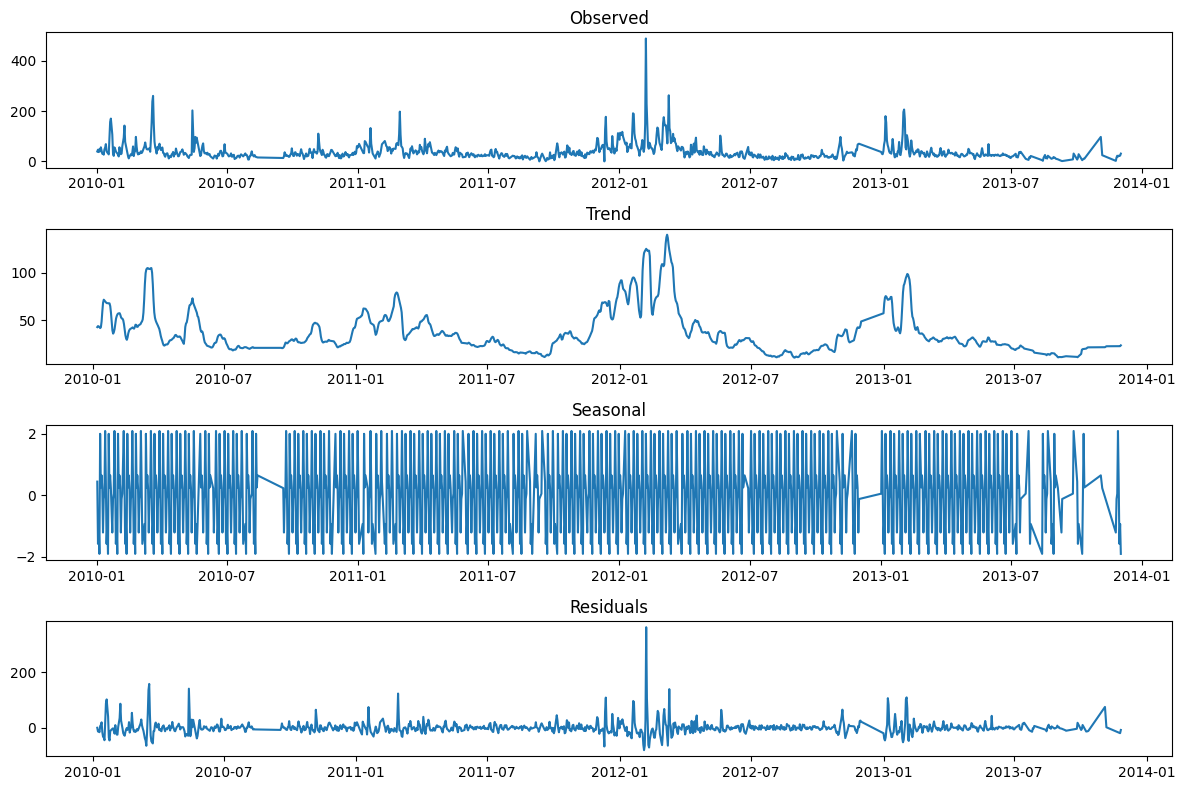

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Charger vos données dans un DataFrame pandas
# Assurez-vous que votre DataFrame a une colonne temporelle et une colonne de valeurs à analyser
# Par exemple :
df = pd.read_csv('data_trait.csv', parse_dates=['Date'], index_col='Date')

# Effectuer la décomposition de la série temporelle avec un modèle de saisonnalité additif
result = seasonal_decompose(df['B'], model='additive', period=12)  # Utilisez period=12 pour une saisonnalité mensuelle

# Afficher les composants décomposés (tendance, saisonnalité, résidus)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuals')
plt.tight_layout()
plt.savefig('graphique_seasonal.png')  # Enregistrer le graphique sous forme d'image
plt.show()


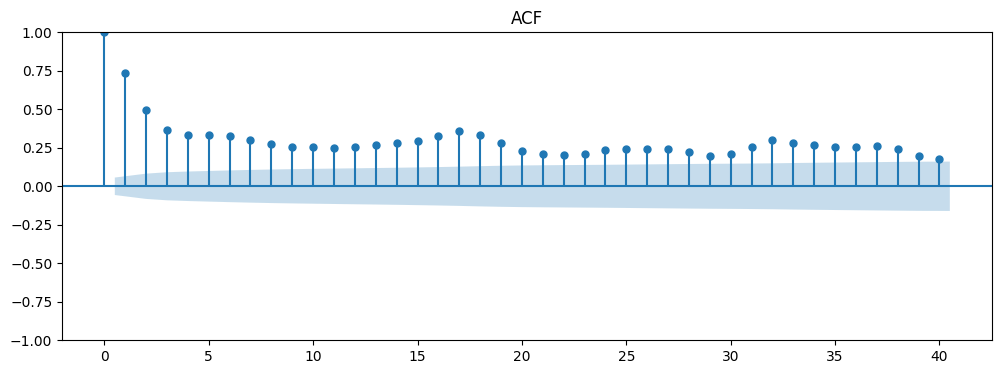

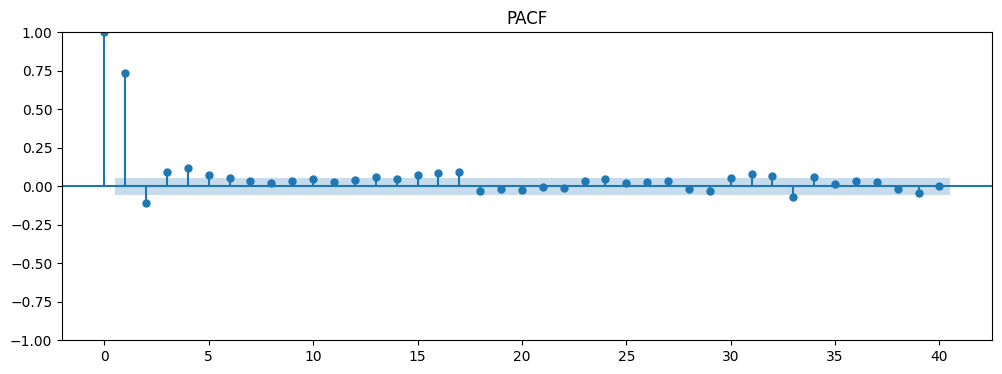

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Afficher l'ACF (Auto-Correlation Function) pour déterminer q (ordre du composant MA)
plt.figure(figsize=(12, 4))
plot_acf(df['B'], lags=40, ax=plt.gca())  # Réglez le nombre de lags en conséquence
plt.title('ACF')
plt.savefig('ACF.png')  # Enregistrer le graphique sous forme d'image

plt.show()

# Afficher le PACF (Partial Auto-Correlation Function) pour déterminer p (ordre du composant AR)
plt.figure(figsize=(12, 4))
plot_pacf(df['B'], lags=40, ax=plt.gca())  # Réglez le nombre de lags en conséquence
plt.title('PACF')
plt.savefig('PACF.png')  # Enregistrer le graphique sous forme d'image

plt.show()


Résultats du test de Dickey-Fuller :
Statistique de test: -3.729162691838131
Valeur p: 0.0037211603661424456
Lags utilisés: 16
Nombre d'observations utilisées: 1175
Valeurs critiques :
	1%: -3.436
	5%: -2.864
	10%: -2.568
La série temporelle est stationnaire à un niveau de confiance de 95%.


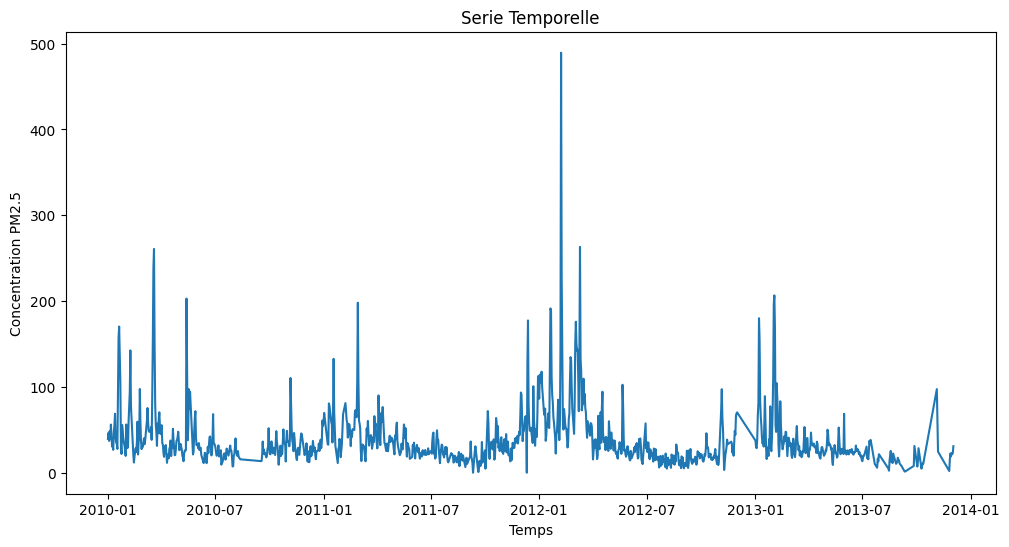

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Fonction pour effectuer le test de Dickey-Fuller augmenté
def test_stationarity(timeseries):
    # Calcul de la statistique du test de Dickey-Fuller augmenté
    result = adfuller(timeseries, autolag='AIC')
    print('Résultats du test de Dickey-Fuller :')
    print('Statistique de test:', result[0])
    print('Valeur p:', result[1])
    print('Lags utilisés:', result[2])
    print('Nombre d\'observations utilisées:', result[3])
    print('Valeurs critiques :')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Comparaison de la statistique du test avec les valeurs critiques
    if result[1] <= 0.05:
        print("La série temporelle est stationnaire à un niveau de confiance de 95%.")
    else:
        print("La série temporelle n'est pas stationnaire.")

# Appeler la fonction pour effectuer le test de Dickey-Fuller augmenté
test_stationarity(df['B'])

# Afficher le graphique de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df['B'])
plt.title('Serie Temporelle')
plt.xlabel('Temps')
plt.ylabel('Concentration PM2.5')

plt.savefig('stationarity.png')  # Enregistrer le graphique sous forme d'image

plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10249.465, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8805.245, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9489.510, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8807.181, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8807.141, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8806.437, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8726.758, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9459.960, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8720.011, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8713.639, Time=0.50 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=8702.224, Time=0.86 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=8674.944, Time=2.99 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=8672.657, Time=2.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8719.278, Time=1.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercep

C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported 

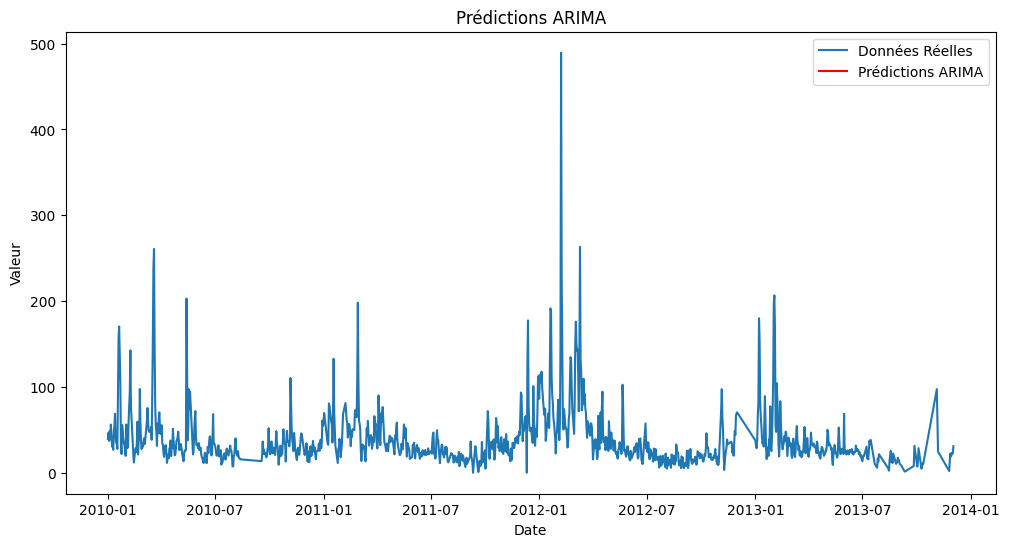

In [11]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from math import sqrt



# Division des données en ensembles d'entraînement et de test
train_size = int(len(df) * 0.8)  # 80% des données pour l'entraînement
train, test = df[:train_size], df[train_size:]

# Recherche automatique du meilleur ordre avec validation croisée
model = pm.auto_arima(train['B'], start_p=0, start_d=0, start_q=0, max_p=4, max_d=1, max_q=4, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, scoring='mse')
print(model.summary())

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(n_periods=len(test))

# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les prédictions
rmse = sqrt(mean_squared_error(test['B'], predictions))
print('RMSE:', rmse)

# Faire des prédictions pour l'ensemble complet des données
future_forecast = model.predict(n_periods=len(df))

# Ajouter les prédictions au DataFrame original pour visualisation
df['ARIMA_Predictions'] = future_forecast

# Afficher le graphique avec les prédictions
plt.figure(figsize=(12, 6))
plt.plot(df['B'], label='Données Réelles')
plt.plot(df['ARIMA_Predictions'], color='red', label='Prédictions ARIMA')
plt.title('Prédictions ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()


In [18]:
df.tail()

,B,ARIMA_Predictions
Date,,
2013-11-28,19.05,NaN
2013-11-29,22.64,NaN
2013-11-30,21.74,NaN
2013-12-01,22.87,NaN
2013-12-02,30.90,NaN


C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWar

RMSE: 28.620211474514228


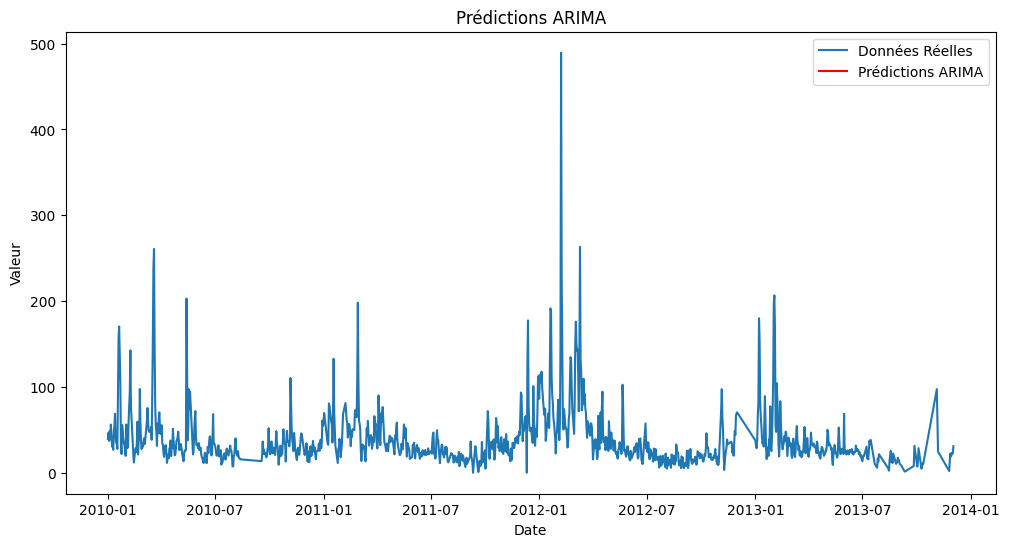

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Charger vos données dans un DataFrame pandas
# Assurez-vous que votre DataFrame a une colonne temporelle et une colonne de valeurs à analyser
# Par exemple :
df = pd.read_csv('data_trait.csv', parse_dates=['Date'], index_col='Date')

# Supprimer les valeurs NaN
df = df.dropna()


# Division des données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_size = int(len(df) * 0.8)  # 80% des données pour l'entraînement
train, test = df[:train_size], df[train_size:]

# Entraînement du modèle ARIMA sur l'ensemble d'entraînement
p, d, q = 1, 1, 1  # Ordres ARIMA (à ajuster selon les résultats de l'analyse ACF et PACF)
model = ARIMA(train['B'], order=(p, d, q))
model_fit = model.fit()

# Faire des prédictions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les prédictions
rmse = sqrt(mean_squared_error(test['B'], predictions))
print('RMSE:', rmse)

# Faire des prédictions pour l'ensemble complet des données
future_forecast = model_fit.forecast(steps=len(df))

# Ajouter les prédictions au DataFrame original pour visualisation
df['ARIMA_Predictions'] = future_forecast

# Afficher le graphique avec les prédictions
plt.figure(figsize=(12, 6))
plt.plot(df['B'], label='Données Réelles')
plt.plot(df['ARIMA_Predictions'], color='red', label='Prédictions ARIMA')
plt.title('Prédictions ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()


RMSE: 33.39535372202664


TypeError: float() argument must be a string or a real number, not 'Period'

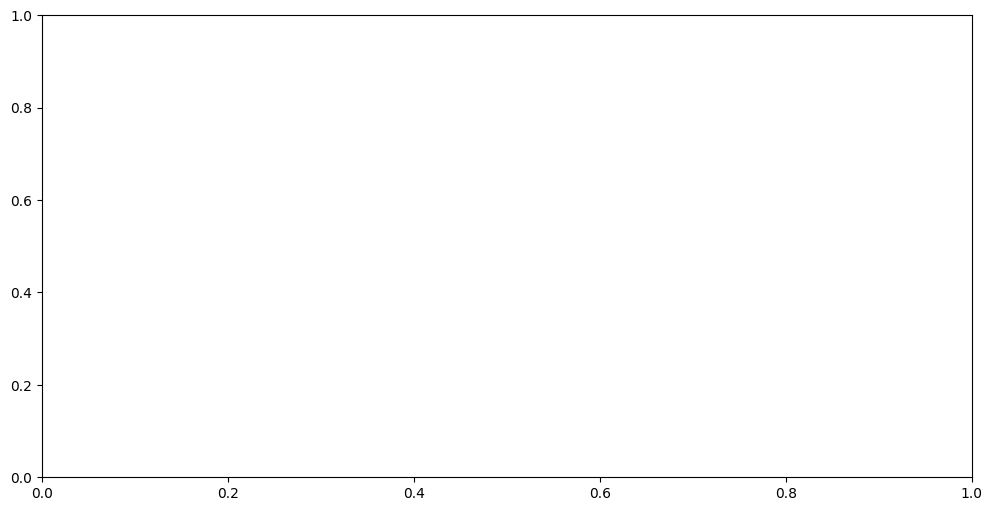

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Charger vos données dans un DataFrame pandas
# Assurez-vous que votre DataFrame a une colonne temporelle et une colonne de valeurs à analyser
# Par exemple :
#df = pd.read_csv('data_trait.csv', parse_dates=['Date'], index_col='Date')
df = pd.read_csv('data.csv', parse_dates=True)
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.index = df.index.to_period('D')
#data = data.dropna()
# Supprimer les valeurs NaN
df = df.dropna()

# Division des données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_size = int(len(df) * 0.8)  # 80% des données pour l'entraînement
train, test = df[:train_size], df[train_size:]

# Entraînement du modèle ARIMA sur l'ensemble d'entraînement
p, d, q = 2, 1, 1  # Ordres ARIMA (à ajuster selon les résultats de l'analyse ACF et PACF)
model = ARIMA(train['Bel Air'], order=(p, d, q))
model_fit = model.fit()

# Faire des prédictions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les prédictions
rmse = sqrt(mean_squared_error(test['Bel Air'], predictions))
print('RMSE:', rmse)

# Faire des prédictions pour l'ensemble complet des données
future_forecast = model_fit.forecast(steps=len(df))

# Ajouter les prédictions au DataFrame original pour visualisation
df['ARIMA_Predictions'] = future_forecast

# Afficher le graphique avec les prédictions
plt.figure(figsize=(12, 6))
plt.plot(df, label='Données Réelles')
plt.plot(df['ARIMA_Predictions'], color='red', label='Prédictions ARIMA')
plt.title('Prédictions ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()


In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Charger vos données dans un DataFrame pandas
# Assurez-vous que votre DataFrame a une colonne temporelle et une colonne de valeurs à analyser
# Par exemple :
#df = pd.read_csv('data_trait.csv', parse_dates=['Date'], index_col='Date')
df = pd.read_csv('data_trait.csv', parse_dates=True)
#df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
#df.index.to_period('D')
# Supprimer les valeurs NaN
df.dropna()

# Division des données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_size = int(len(df) * 0.8)  # 80% des données pour l'entraînement
train, test = df[:train_size], df[train_size:]

# Liste des ordres à explorer
p_values = range(0, 3)  # Valeurs possibles pour p (ordre de l'AR)
d_values = range(0, 3)  # Valeurs possibles pour d (ordre de la différenciation)
q_values = range(0, 3)  # Valeurs possibles pour q (ordre du MA)

best_rmse, best_order = float('inf'), None

# Recherche de grille pour trouver le meilleur ordre (p, d, q)
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Entraîner le modèle ARIMA avec l'ordre courant
                model = ARIMA(train['B'], order=(p, d, q))
                model_fit = model.fit()
                
                # Faire des prédictions sur l'ensemble de test
                predictions = model_fit.forecast(steps=len(test))
                
                # Calculer l'erreur quadratique moyenne (RMSE) pour l'ordre courant
                rmse = sqrt(mean_squared_error(test['B'], predictions))
                
                # Mettre à jour le meilleur ordre si l'erreur est plus faible
                if rmse < best_rmse:
                    best_rmse, best_order = rmse, (p, d, q)
                
            except:
                continue

print('Meilleur ordre (p, d, q) trouvé:', best_order)
print('RMSE correspondant:', best_rmse)

# Entraîner le modèle ARIMA avec le meilleur ordre sur l'ensemble complet des données
model = ARIMA(df['B'], order=best_order)
model_fit = model.fit()

# Faire des prédictions pour l'ensemble complet des données
future_forecast = model_fit.forecast(steps=len(df))

# Ajouter les prédictions au DataFrame original pour visualisation
df['ARIMA_Predictions'] = future_forecast

# Afficher le graphique avec les prédictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['B'], label='Données Réelles')
plt.plot(df['ARIMA_Predictions'], color='red', label='Prédictions ARIMA')
plt.title('Prédictions ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()


AttributeError: 'Index' object has no attribute 'to_period'

C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarnin

Meilleur ordre (p, d, q) trouvé avec validation croisée: (0, 1, 1)
RMSE correspondant: 30.478132190584176


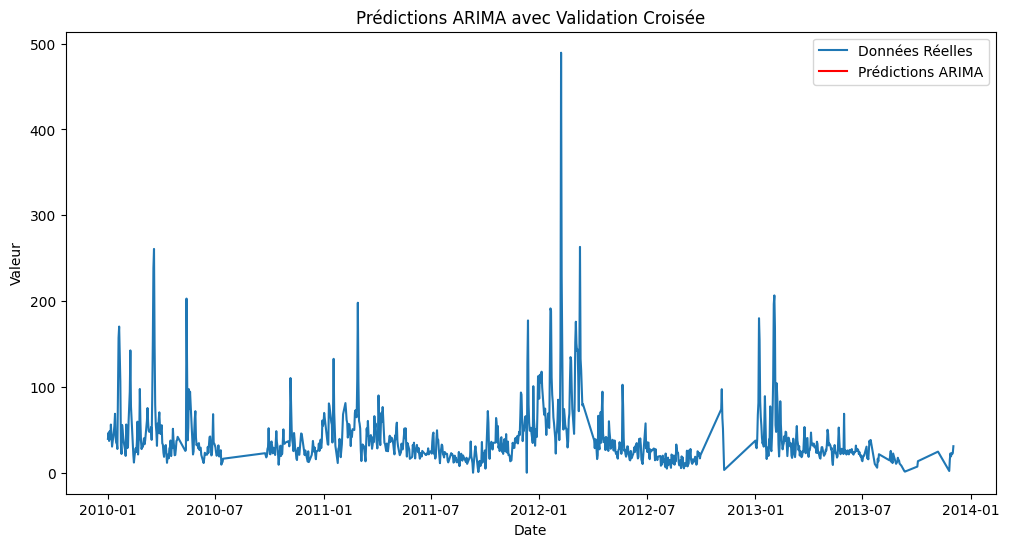

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt

# Charger vos données dans un DataFrame pandas
# Assurez-vous que votre DataFrame a une colonne temporelle et une colonne de valeurs à analyser
# Par exemple :
df = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')

# Supprimer les valeurs NaN
df = df.dropna()

# Division des données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_size = int(len(df) * 0.8)  # 80% des données pour l'entraînement
train, test = df[:train_size], df[train_size:]

# Liste des ordres à explorer
p_values = range(0, 4)  # Valeurs possibles pour p (ordre de l'AR)
d_values = range(0, 3)  # Valeurs possibles pour d (ordre de la différenciation)
q_values = range(0, 4)  # Valeurs possibles pour q (ordre du MA)

# Effectuer une recherche de grille avec validation croisée
best_rmse, best_order = float('inf'), None
tscv = TimeSeriesSplit(n_splits=5)  # Utilisation de la validation croisée avec 5 plis

for p in p_values:
    for d in d_values:
        for q in q_values:
            rmse_scores = []
            for train_index, val_index in tscv.split(train):
                train_data, val_data = train.iloc[train_index], train.iloc[val_index]
                try:
                    # Entraîner le modèle ARIMA avec l'ordre courant
                    model = ARIMA(train_data['Bel Air'], order=(p, d, q))
                    model_fit = model.fit()
                
                    # Faire des prédictions sur l'ensemble de validation
                    predictions = model_fit.forecast(steps=len(val_data))
                
                    # Calculer l'erreur quadratique moyenne (RMSE) pour l'ordre courant
                    rmse = sqrt(mean_squared_error(val_data['Bel Air'], predictions))
                    rmse_scores.append(rmse)
                
                except:
                    continue
            
            # Calculer la moyenne des RMSE pour ce jeu d'ordres
            avg_rmse = sum(rmse_scores) / len(rmse_scores)
            
            # Mettre à jour le meilleur ordre si l'erreur est plus faible
            if avg_rmse < best_rmse:
                best_rmse, best_order = avg_rmse, (p, d, q)

print('Meilleur ordre (p, d, q) trouvé avec validation croisée:', best_order)
print('RMSE correspondant:', best_rmse)

# Entraîner le modèle ARIMA avec le meilleur ordre sur l'ensemble complet des données
model = ARIMA(df['Bel Air'], order=best_order)
model_fit = model.fit()

# Faire des prédictions pour l'ensemble complet des données
future_forecast = model_fit.forecast(steps=len(df))

# Ajouter les prédictions au DataFrame original pour visualisation
df['ARIMA_Predictions'] = future_forecast

# Afficher le graphique avec les prédictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Bel Air'], label='Données Réelles')
plt.plot(df['ARIMA_Predictions'], color='red', label='Prédictions ARIMA')
plt.title('Prédictions ARIMA avec Validation Croisée')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()
